
### This notebook generates basic descriptive statistics and visualizations.

Functions:
- Create demographic breakdowns (pie charts, bar graphs)
- Analyze and visualize AI Safety and ML Literacy levels
- Generate visualizations for pre-intervention opinions
- Calculate summary statistics for key variables

In [1]:
import pandas as pd

# import plotly.graph_objects as go
# import plotly.express as px

# from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

# df = pd.read_csv("AI Safety Perceptions Survey_August 20, 2024_12.01.csv")
df = pd.read_csv("data_latest.csv")
df = fix_data(df)

df_safety = df[df['Q1'] == 'AI Safety Researcher']
df_engineer = df[df['Q1'] == 'Industry']
df_academic = df[df['Q1'] == 'Academic']

In [2]:
df``

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46,number
0,2024-07-31 14:21:40,2024-07-31 14:21:49,Survey Preview,NaN,100,9,True,2024-07-31 14:21:50,R_7j9uOsSf4WN1o8Q,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,2024-07-31 14:22:24,2024-07-31 14:22:34,Survey Preview,NaN,100,10,True,2024-07-31 14:22:34,R_7N2fCyZF2BnXcBX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2024-08-01 15:55:11,2024-08-01 15:56:35,Survey Preview,NaN,100,83,True,2024-08-01 15:56:36,R_8fTDDvLSXZ8DPGN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
3,2024-08-02 14:54:34,2024-08-02 15:01:21,Survey Preview,NaN,100,407,True,2024-08-02 15:01:22,R_3fkIU8ghWir8okP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,2024-08-06 14:26:13,2024-08-06 14:26:44,Survey Preview,NaN,100,31,True,2024-08-06 14:26:45,R_8dG4EC22sLG6Mpj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2024-08-14 13:59:44,2024-08-14 14:19:01,IP Address,91.178.218.139,76,1156,False,2024-08-21 14:19:04,R_2lt9dBTkyLAEOZX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
77,2024-08-21 14:48:35,2024-08-21 14:55:15,IP Address,51.198.222.122,100,400,True,2024-08-21 14:55:16,R_85yGxhgaC27BTqZ,NaN,...,Somewhat disagree,strongly disagree,Somewhat disagree,Somewhat agree,strongly disagree,Strongly agree,NaN,NaN,j.m.clarke@surrey.ac.uk,0
78,2024-08-21 16:04:46,2024-08-21 16:07:28,IP Address,185.219.111.185,100,161,True,2024-08-21 16:07:28,R_2q4aULmjF8oWBoG,NaN,...,Somewhat disagree,strongly disagree,strongly disagree,Strongly agree,Somewhat disagree,Strongly agree,NaN,NaN,NaN,9
79,2024-08-14 18:35:53,2024-08-14 18:36:27,IP Address,18.29.64.97,18,34,False,2024-08-21 18:36:28,R_3Bm0flTAVoYYlgK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# show df but only show the columns IPAddress and 'number'


# print ALL the first 10 rows
print(df[['IPAddress', 'number']].head(10))



        IPAddress  number
0             NaN       7
1             NaN       0
2             NaN      13
3             NaN       7
4             NaN      13
5   71.202.39.170       9
6  72.216.155.213       0
7    70.95.140.50       0
8    99.74.171.86       7
9   72.200.123.74       9


In [7]:
print(df[['IPAddress', 'number']].tail(10))


          IPAddress  number
71   184.181.99.127      13
72  185.219.111.185       7
73  185.219.111.185       9
74   128.179.254.75       7
75    152.37.84.214       7
76   91.178.218.139       9
77   51.198.222.122       0
78  185.219.111.185       9
79      18.29.64.97       0
80    99.44.171.191       0


In [92]:
df['Q1'].value_counts()

Academic                43
Industry                10
AI Safety Researcher     7
Other                    4
Name: Q1, dtype: int64

In [93]:
# create df_safety for respondants who answered Q1 saying "AI Safety"


In [94]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46,number
0,2024-07-31 14:21:40,2024-07-31 14:21:49,Survey Preview,NaN,100,9,True,2024-07-31 14:21:50,R_7j9uOsSf4WN1o8Q,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2024-08-01 15:55:11,2024-08-01 15:56:35,Survey Preview,NaN,100,83,True,2024-08-01 15:56:36,R_8fTDDvLSXZ8DPGN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
3,2024-08-02 14:54:34,2024-08-02 15:01:21,Survey Preview,NaN,100,407,True,2024-08-02 15:01:22,R_3fkIU8ghWir8okP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,2024-08-06 14:26:13,2024-08-06 14:26:44,Survey Preview,NaN,100,31,True,2024-08-06 14:26:45,R_8dG4EC22sLG6Mpj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5,2024-08-08 23:30:29,2024-08-08 23:32:27,IP Address,71.202.39.170,100,118,True,2024-08-08 23:32:28,R_7Tzy4TQlrII28TZ,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN,9


In [95]:
# check the columns of df
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q42', 'Q43', 'Q1', 'Q1_7_TEXT',
       'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4',
       'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8',
       'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18', 'Q46', 'number'],
      dtype='object')

# Demographics Charts
* job title
* years of experience
* 

In [96]:
def create_demographics_chart(df):
    # Count the occurrences of each category
    demo_counts = df['Q1'].value_counts()
    
    # Create a pie chart
    fig = px.pie(
        values=demo_counts.values,
        names=demo_counts.index,
        title="Participant Demographics (N=81)"
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    return fig

In [97]:
def create_experience_histogram(data, title='Years of Experience'):
    numeric_data = pd.to_numeric(data, errors='coerce')
    numeric_data = numeric_data.dropna()

    sorted_data = np.sort(numeric_data)

    fig = go.Figure()
    fig.add_trace(go.Box(y=sorted_data, name='Years of Experience'))

    fig.update_layout(
        title=title,
        yaxis_title='Years',
        showlegend=False
    )

    return fig


In [104]:
fig1 = create_demographics_chart(df)
# update layout to be a square
fig1.update_layout(
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)


# config = {
#   'toImageButtonOptions': {
#     'format': 'svg', # one of png, svg, jpeg, webp
#     'filename': 'custom_image',
#     'height': 5000,
#     'width': 6000,
#     'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
#   }
# }
fig1.show()

# save as html
fig1.write_html("demographics.html")



In [32]:
# fig1.write_image("literacy_scores_heatmap.pdf")

In [33]:
fig2 = create_experience_histogram(df["Q2"], title='Years of Experience (all participants)')
fig2.show()

# fig3 = create_experience_histogram(df_safety["Q2"], title='Years of Experience (AI Safety Researchers)')
# fig3.show()

# fig4 = create_experience_histogram(df_engineer["Q2"], title='Years of Experience (Industry Engineers)')
# fig4.show()

# fig5 = create_experience_histogram(df_academic["Q2"], title='Years of Experience (Academic Researchers)')
# fig5.show()


In [34]:
df["Q2"]

0     NaN
2     4.0
3     5.0
4     8.0
5     2.0
     ... 
73    NaN
74    NaN
75    NaN
76    1.0
78    2.0
Name: Q2, Length: 71, dtype: float64

In [35]:
# experience histogram all in one
N = 4
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
# list of 4 colors
c = ['blue', 'green', 'red', 'purple']

y_datas = [df["Q2"], df_safety["Q2"], df_engineer["Q2"], df_academic["Q2"]]
legend_labels = ['All Participants', 'AI Safety Researchers', 'Industry Engineers', 'Academic Researchers']
y_datas_fixed = []
for data in y_datas:
    numeric_data = pd.to_numeric(data, errors='coerce')
    numeric_data = numeric_data.dropna()

    sorted_data = np.sort(numeric_data)
    y_datas_fixed.append(sorted_data)

fig = go.Figure(data=[go.Box(
    y=y_datas_fixed[i],
    marker_color=c[i],
    name=legend_labels[i]
    ) for i in range(int(N))])

fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
    title='Years of Experience',
    width=1400,
    height=800

)

fig.show()

# Literacy
* average literacy score
* literacy score by group (ai researcher, etc.)
* literacy vs timelines
* calculating average literacy score

In [36]:

# 4. Opinions on AGI development
def create_agi_opinion_chart(df, title="Opinions on AGI Development"):
    opinion_counts = df['Q5'].value_counts()
    opinion_counts = opinion_counts.sort_index()
    
    fig = px.bar(
        x=opinion_counts.index,
        y=opinion_counts.values,
        title=title,
        labels={'x': 'Opinion', 'y': 'Count'}
    )

    
    # fig.update_layout(xaxis={'categoryorder':'total descending'})
    # set title 
    return fig

In [105]:

fig4 = create_agi_opinion_chart(df)
# update to larger font size

fig4.show()

In [106]:
# save fig4 as html
fig4.write_html("agi_opinions.html")

In [38]:
import plotly.graph_objects as go
from plotly import data



In [39]:
# 3. AI Safety and ML Literacy
def create_literacy_heatmap(df, title="Average Literacy Scores"):
    safety_columns = ['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4']
    ml_columns = ['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4']

    # Create a mapping for the literacy levels
    literacy_map = {
        'Never heard of it': 0,
        'Heard of it': 1,
        'Know a little': 2,
        'Know a fair amount': 3,
        'Know it well': 4
    }
    


    for col in safety_columns + ml_columns:
        df[col] = df[col].map(literacy_map)

    # Calculate the mean literacy score for each concept
    safety_scores = df[safety_columns].mean()
    ml_scores = df[ml_columns].mean()

    # Combine the scores into a single DataFrame
    scores_df = pd.DataFrame({
        'AI Safety': safety_scores.values,
        'Machine Learning': ml_scores.values
    }, index=['Concept 1', 'Concept 2', 'Concept 3', 'Concept 4'])

    fig = px.imshow(
        scores_df.T,
        title=title,
        labels=dict(x="", y="", color="Average Score"),
        color_continuous_scale="Viridis",
        # do not show the x-axis labels
        
    )
    fig.update_xaxes(side="top")

    ml_concepts = [
    "Machine learning algorithms",
    "Logistic Regression",
    "Empirical Risk Minimization",
    "Markov random fields"
    ]

    ai_safety_concepts = [
        "The \"AI alignment problem\"",
        "Scalable Oversight",
        "Instrumental convergence",
        "Coherent extrapolated volition"
    ]

    fig.update_layout(
        xaxis_side="top",
        xaxis_tickangle=0,
        height=800,
        width=1400,
        margin=dict(t=80, b=80, l=100, r=100),
        xaxis=dict(domain=[0.1, 0.9], showticklabels=False),  # Hide x-axis labels
        yaxis=dict(domain=[0.1, 0.9]),
        # raise font size
        font=dict(size=15)
    )
    for i, concept in enumerate(ai_safety_concepts):
        fig.add_annotation(
            x=i,
            y=1,
            text=concept,
            showarrow=False,
            textangle=-20,
            yref="paper",
            font=dict(size=15)
        )

    # Add annotations for AI Safety concepts (above the heatmap)
    for i, concept in enumerate(ml_concepts):
        fig.add_annotation(
            x=i,
            y=-0,
            text=concept,
            showarrow=False,
            textangle=20,
            yref="paper",
            font=dict(size=15)
        )

    return fig

literacy_map = create_literacy_heatmap(df_engineer, "AI Engineer Literacy")

literacy_map.show()

C:\Users\sevde\AppData\Local\Temp\ipykernel_3976\4031418404.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sevde\AppData\Local\Temp\ipykernel_3976\4031418404.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sevde\AppData\Local\Temp\ipykernel_3976\4031418404.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [115]:
literacy_map = create_literacy_heatmap(df, "Average Literacy Scores")

literacy_map.show()

In [116]:
# save litearcy map to html/literacy_map.html
literacy_map.write_html("html/literacy_map.html")

In [40]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q42', 'Q43', 'Q1', 'Q1_7_TEXT',
       'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4',
       'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8',
       'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18', 'Q46', 'number'],
      dtype='object')

In [41]:
result = pd.crosstab(df['Q1'], df['Q5'], normalize='index')

In [42]:
result = result.reset_index()
result

Q5,Q1,"Eventually, but not soon.","Soon, but not as fast as possible",We should develop more powerful and more general systems as fast as possible,We should never build AGI
0,AI Safety Researcher,0.857143,0.142857,0.000000,0.000000
1,Academic,0.333333,0.309524,0.285714,0.071429
2,Industry,0.200000,0.300000,0.400000,0.100000
3,Other,0.500000,0.250000,0.250000,0.000000


In [43]:
result['Q1'].value_counts()

AI Safety Researcher    1
Academic                1
Industry                1
Other                   1
Name: Q1, dtype: int64

In [44]:
# replace values in "Q5" with more readable values (Other, AI Safety Reseacher, Academic, Industry)
result['Q1'] = result['Q1'].replace({
    '4': 'Other',
    'AI safety researcher or professional': 'AI Safety Researcher',
    'Academic researcher in AI/ML/related field (e.g. PhD student, postdoc, professor)': 'Academic',
    'Industry engineer or researcher in AI/ML/related field': 'Industry',
    'Computer science professional or student not focused on ML/AI (e.g. Software Engineer, CS student)': "non-ML"
})

In [108]:
fig = go.Figure(
    data=[
        go.Bar(x=result['Q1'], y=result['Eventually, but not soon.'], name="Eventually, but not soon."),
        go.Bar(x=result['Q1'], y=result['Soon, but not as fast as possible'], name="Soon, but not as fast as possible"),
        go.Bar(x=result['Q1'], y=result['We should develop more powerful and more general systems as fast as possible'], name="We should develop more powerful and more general systems as fast as possible"),
        go.Bar(x=result['Q1'], y=result['We should never build AGI'], name="We should never build AGI"),
    ],
    layout=dict(
        barcornerradius=15,
    ),

    # make the font WAY bigger everywhere
    layout_title_text="Opinions on AGI Development",
    layout_font=dict(size=20),
    
)

fig.show()

In [109]:
# save fig to html in html/agi_development.html
fig.write_html("html/agi_development.html")

## Note: add the size of each sub-group to the diagram

In [50]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46,number
0,2024-07-31 14:21:40,2024-07-31 14:21:49,Survey Preview,NaN,100,9,True,2024-07-31 14:21:50,R_7j9uOsSf4WN1o8Q,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2024-08-01 15:55:11,2024-08-01 15:56:35,Survey Preview,NaN,100,83,True,2024-08-01 15:56:36,R_8fTDDvLSXZ8DPGN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
3,2024-08-02 14:54:34,2024-08-02 15:01:21,Survey Preview,NaN,100,407,True,2024-08-02 15:01:22,R_3fkIU8ghWir8okP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,2024-08-06 14:26:13,2024-08-06 14:26:44,Survey Preview,NaN,100,31,True,2024-08-06 14:26:45,R_8dG4EC22sLG6Mpj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5,2024-08-08 23:30:29,2024-08-08 23:32:27,IP Address,71.202.39.170,100,118,True,2024-08-08 23:32:28,R_7Tzy4TQlrII28TZ,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-08-14 13:02:13,2024-08-14 13:02:39,IP Address,185.219.111.185,18,26,False,2024-08-21 13:02:42,R_2QMkcEXbekINVx1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
74,2024-08-14 14:03:43,2024-08-14 14:04:39,IP Address,128.179.254.75,18,55,False,2024-08-21 14:04:40,R_2mueUG8hzZtCJaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
75,2024-08-09 15:32:53,2024-08-14 14:09:35,IP Address,152.37.84.214,76,427001,False,2024-08-21 14:09:39,R_8TmWsmpUSU5lH2p,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
76,2024-08-14 13:59:44,2024-08-14 14:19:01,IP Address,91.178.218.139,76,1156,False,2024-08-21 14:19:04,R_2lt9dBTkyLAEOZX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [60]:
df['number'] = df['number'].replace(7, "Control")
df['number'] = df['number'].replace(9, "Russel")
df['number'] = df['number'].replace(11, "Joy")
df['number'] = df['number'].replace(13, "Aschenbrenner")
# get Q15 and df[number] into a new dataframe
df_agreement = df[['Q15', 'number']]

In [61]:
df_agreement

,Q15,number
0,NaN,Control
2,NaN,Aschenbrenner
3,NaN,Control
4,NaN,Aschenbrenner
5,Somewhat agree,Russel
...,...,...
73,NaN,Russel
74,NaN,Control
75,NaN,Control
76,NaN,Russel


In [62]:
# replace the values in Q15 with numerical values (1-5)
df_agreement['Q15'] = df_agreement['Q15'].replace({
    'Strongly disagree': 1,
    'Somewhat disagree': 2,
    'Neither agree nor disagree': 3,
    'Somewhat agree': 4,
    'Strongly agree': 5
})

C:\Users\sevde\AppData\Local\Temp\ipykernel_3976\109670008.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df_agreement["Q15"].value_counts()

4.0    22
3.0    20
2.0    10
1.0     3
5.0     1
Name: Q15, dtype: int64

In [64]:
df_agreement

,Q15,number
0,NaN,Control
2,NaN,Aschenbrenner
3,NaN,Control
4,NaN,Aschenbrenner
5,4.0,Russel
...,...,...
73,NaN,Russel
74,NaN,Control
75,NaN,Control
76,NaN,Russel


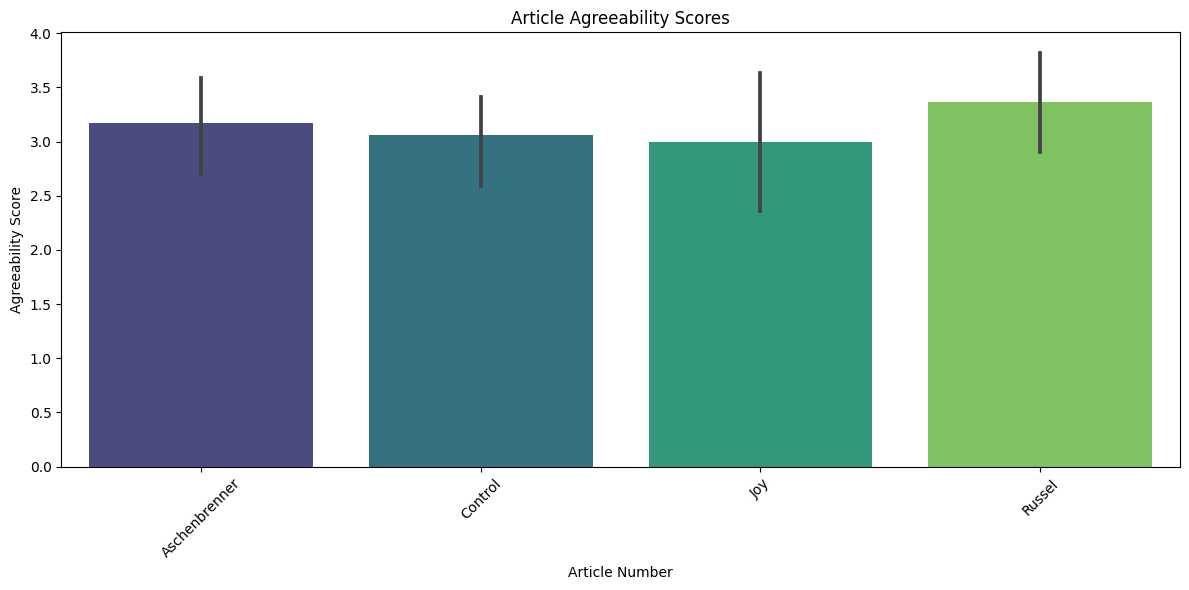

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out NaN values and sort by 'number'
df_filtered = df_agreement.dropna(subset=['Q15']).sort_values('number')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='number', y='Q15', data=df_filtered, palette='viridis')

# Customize the plot
plt.title('Article Agreeability Scores')
plt.xlabel('Article Number')
plt.ylabel('Agreeability Score')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
df_agreement

,Q15,number
0,NaN,Control
2,NaN,Aschenbrenner
3,NaN,Control
4,NaN,Aschenbrenner
5,4.0,Russel
...,...,...
73,NaN,Russel
74,NaN,Control
75,NaN,Control
76,NaN,Russel


In [77]:
df_agreement['number'].value_counts()

Control          17
Aschenbrenner    17
Russel           11
Joy              11
Name: number, dtype: int64

In [73]:
# drop all the nan values
df_agreement = df_agreement.dropna()


In [81]:
# change the column q15 to int
df_agreement['Q15'] = df_agreement['Q15'].astype(int)


C:\Users\sevde\AppData\Local\Temp\ipykernel_3976\1403038907.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
# make a px.bar chart
fig = px.box(df_agreement, x='number', y='Q15', title='Article Agreeability Scores')

In [113]:
# update the font size to 32px everywhere
fig.update_layout(
    font=dict(size=32)
)
fig.show()


In [114]:
# save the fig to html (html/agreeability_scores.html)
fig.write_html("html/agreeability_scores.html")

In [46]:
# fig5 = create_agi_opinion_chart(df_safety, "Safety Researcher Opinions on AGI Development")
# fig5.show()

# fig6 = create_agi_opinion_chart(df_engineer, "Engineer Opinions on AGI Development")
# fig6.show()

# fig7 = create_agi_opinion_chart(df_academic, "Academic Opinions on AGI Development")
# fig7.show()